In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [104]:
df_cal=pd.read_csv("C:\\Users\\KIIT\\Desktop\\Datasets\\Calorie\\calories.csv")

In [105]:
df_cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [106]:
df_cal.shape

(15000, 2)

In [107]:
df_ex=pd.read_csv("C:\\Users\\KIIT\\Desktop\\Datasets\\Calorie\\exercise.csv")

In [108]:
df_ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [109]:
df_ex.shape

(15000, 8)

In [110]:
#we need to join both DFs df_cal, df_ex
df=pd.concat([df_ex,df_cal['Calories']], axis=1)  #axis=1 means adding data column wise
#including df_cal['calories'] so that we can concat calorie column only

In [111]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [112]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [113]:
df.corr()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


In [114]:
df.describe()
#here we observe that if herat rate amd body_temp is more, then user is doing more exercise and burning more calories

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [115]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [116]:
df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [117]:
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

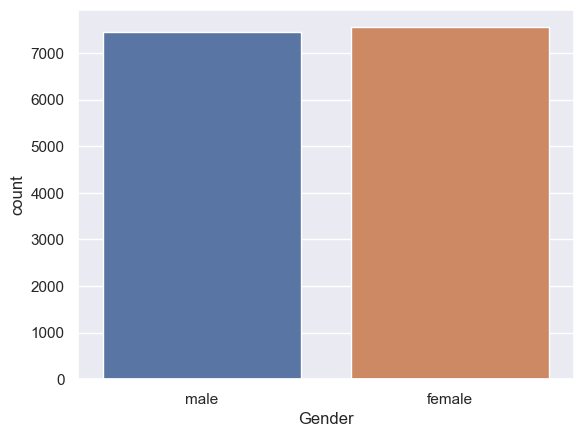

In [118]:
sns.countplot(df['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

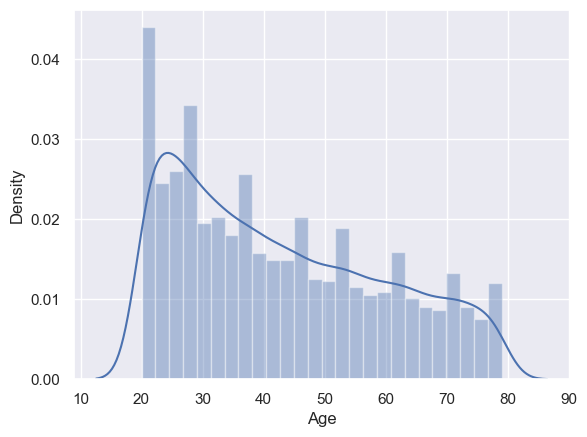

In [119]:
sns.distplot(df['Age']) #20-30 aged people has more count, means iss age grp ke log zada exrrcise krrey

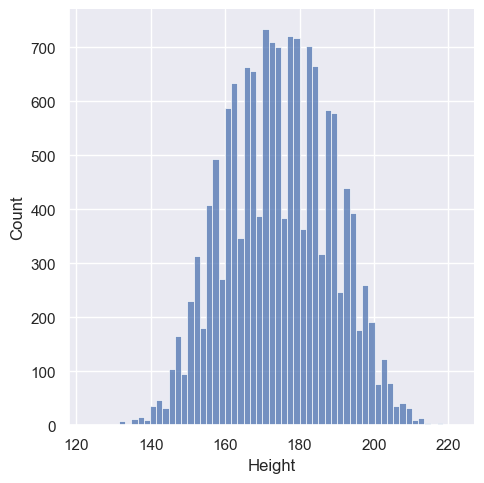

In [120]:
sns.displot(df['Height'])  #distribution of Height

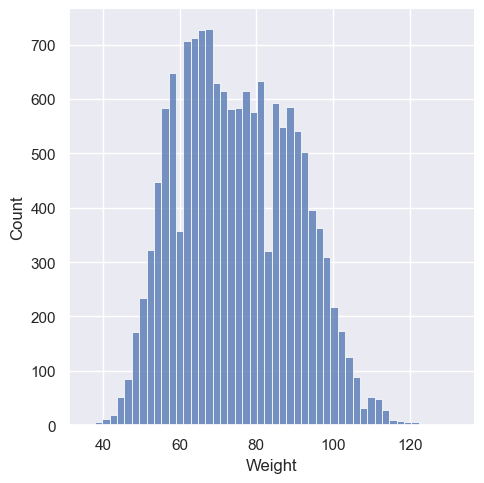

In [121]:
sns.displot(df['Weight']) #distribution of Weight

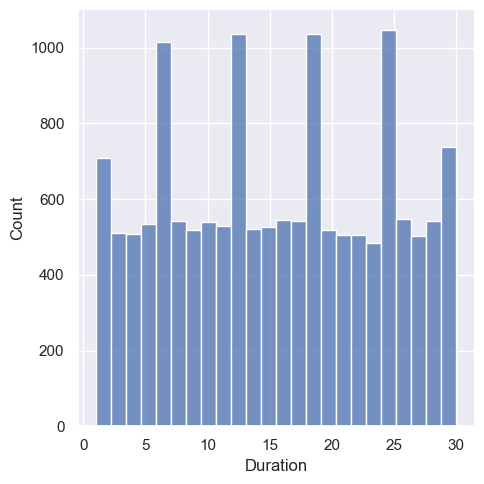

In [122]:
sns.displot(df['Duration']) #max people exercie for 6-7 min, 12-13min, 18-19min, 25-26min

<AxesSubplot:>

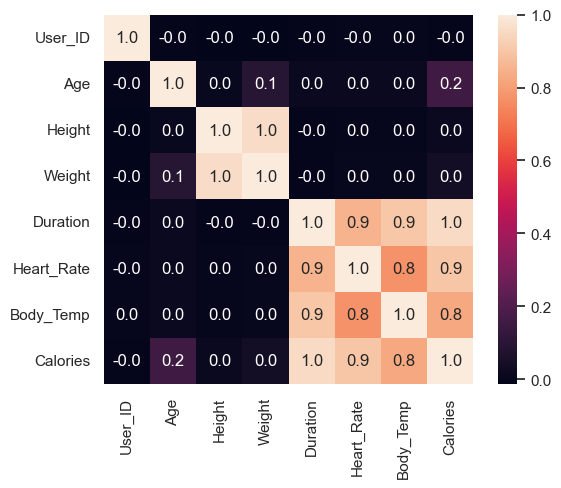

In [123]:
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.1f',annot=True)

In [124]:
df=df.replace({"Gender":{"male":1,"female":0}})

In [125]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [168]:
X=df.drop(columns=['User_ID','Calories'],axis=1)
y=df['Calories']

In [187]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.176,random_state=102)

In [188]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12360, 7) (2640, 7)


In [189]:
model=XGBRegressor()

In [190]:
#training the model

In [191]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [203]:
test_data_prediction=model.predict(X_test)

In [204]:
print(test_data_prediction)  #model has predicted these results......

[ 90.19962  159.10814   48.68468  ...  49.51037   44.659695 146.05162 ]


In [186]:
#we need to subtract actual - predicted, mean absolute error
mae=metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error: ",mae)
#here we are getting less mae, so well trained

Mean Absolute Error:  1.5180971765178115


In [200]:
print("Accuracy on DataSet: ",round(model.score(X_test,y_test)*100,2),"%")

Accuracy on DataSet:  99.87 %


In [205]:
diff=y_test-test_data_prediction

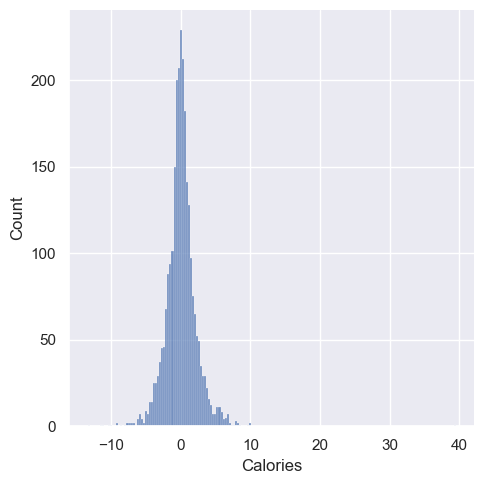

In [206]:
sns.displot(diff)

In [207]:
import pickle

In [209]:
pickle.dump(model,open('./model.sav','wb'))